# Python (Python 3) - NumPy - SciPy

## Wichtige Funktionalitäten für die LV "Statistik"

Der wesentliche Inhalt dieses Notebooks entstammt der folgenden Quelle: https://www.python-kurs.eu/python3_kurs.php  
Diese Seite ist ausgezeichnet geeignet, um Python-Grundlagen interaktiv zu erlernen.  
Dazu gehören folgende zwei Lehrbücher:  
**"Numerisches Python: Arbeiten mit NumPy, Matplotlib und Pandas"**  
https://www.hanser-fachbuch.de/buch/Numerisches+Python/9783446450769  
**"Einführung in Python3: Für Ein- und Umsteiger"**  
http://www.hanser-fachbuch.de/buch/Einfuehrung+in+Python+3/9783446452084


### Ausführen von Python-Code im Gegensatz zur Nutzung der interaktiven Shell

Bei Nutzung von Jupyter-Notebook genügt es, den Programmcode in eine "Code"-Zelle einzutragen und mittels Run-Button zu starten. 

- Die Strukturierung innerhalb eines Programms erfolgt mittels Einrücken.

    Anweisungskopf:
        Anweisung  
        .  
        Anweisung  
    
- Variablen benötigen keine Typdeklaration.
- Seit Python3 ist das Resultat der Division zweier Integer-Werte automatisch float.
- Eine Variable ist nach Zuweisung automatisch lokal in diesem Block, es sei denn man hat sie explizit mit dem Schlüsselwort "global" definiert.

In [1]:
print ("Python für Statistik")

from math import sqrt
n = 10
for a in range(1,n):
    for b in range(a,int(n/2)):
        c = a / b
        if (c <= .5):
            print(a, b, c)

Python für Statistik
1 2 0.5
1 3 0.3333333333333333
1 4 0.25
2 4 0.5


### Datentypen in Python
#### Datentypen für Zahlen

- Ganzzahl: Integer, Oktal, Hexadezimal, Binär, 
- Float
- Complex

#### Andere Datentypen

- String: s="Hallo"  (Zeichenkette)
- Liste: l=[1, 2, 3] (Veränderbare Liste mit Reihenfolge)
- Tupel: t=(1, 2, 3) (Unveränderbare Liste mit Reihenfolge)
- Dictionary: d={1: "eins", 2: "zwei", 3: "drei"}  (Assoziatives Array)

Für Mathematik in der Statistik benötigen wir Arrays (Felder). Diese sind Bestandteil des Moduls NumPy.

### Module und deren Nutzung

In Python unterscheide man zwei Arten von Modulen:

- Bibliotheken (Libraries)
  Stellen Datentypen und Funktionen für alle Python-Programme bereit. Es gibt:
        - umfangreiche Standardbibliotheken
        - eigene Module
        - Module von Drittanbietern 
- lokale Module
    
Ein Modul, egal ob aus der Standardbibliothek oder einer eigenen, wird mit der import-Anweisung eingebunden.

Einige Beispiele:
- mehrere Module können auf einmal importiert werden, deren Namen stehen dann in einem eigenen Namensraum zur Verfügung
- einzelne Methoden/Funktionen können auch selektiv ausgewählt werden, die anderen Methoden der Bibliohek stehen dann nicht zur Verfügung
- der Namensraum kann auch umbenannt werden

In [84]:
import math
pi = math.pi
sin_pi_2 = math.sin(math.pi/2)
cos_pi_2 = math.cos(math.pi/2)
cos_pi = math.cos(math.pi)
print (pi, sin_pi_2, cos_pi_2, cos_pi)

3.141592653589793 1.0 6.123233995736766e-17 -1.0


In [3]:
pi = 3.1415
print (pi)
from math import pi
print (pi)

3.1415
3.141592653589793


In [4]:
import math as m
sin_pi = m.sin(m.pi)
print (sin_pi)

1.2246467991473532e-16


# Module für mathematische (statistische) Berechnungen

Numerisches Python (Numerisches Programmieren) bedeutet hier "Math. Programmieren mit Zahlen".
Reines Python (ohne numerische Spezialmodule) würde sich nicht besonders gut eignen für unsere Aufgaben in der Statistik. Deshalb nutzen wir Python in Kombination mit Modulen wie NumPy, SciPy, Matplotlib und Pandas:

- **NumPy:** implementiert mehrdimensionale Arrays und Matrizen und stellt grundlegende Funktionalitäten zur Erzeugung und Manipulation solcher Datenstrukturen zur Verfügung
- **SciPy:** benutzt die von NumPy bereitgestellten Datenstrukturen und erweitert die Leistungsfähigkeit um komplexere math. Funktionen, wie u. a. auch statistische Funktionen.
- **MathPlotlib:** Erweitert die Funktionalität um aussagekräftige grafische Darstellungen.
- **Pandas:** stellt Datenstrukturen und Operationen zur Manipulation von Tabellen und Zeitreihen bereit

# NumPy

## Datenstruktur array
Beispiele:

In [3]:
import numpy as np
# Definition einer Liste von Temperaturwerten ("Standard"-Python)
tvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 21.8, 21.3, 20.9, 20.1]
T = np.array(tvalues)
print(T, type(T), type(tvalues))

[20.1 20.8 21.9 22.5 22.7 21.8 21.3 20.9 20.1] <class 'numpy.ndarray'> <class 'list'>


In [4]:
# auf diesem array sind skalare Operationen einfach möglich, z.B. Umrechnung in Grad Fahrenheit
print(T * 9 / 5 + 32)
# das array T selbst wird dabei nicht verändert
print (T)

[68.18 69.44 71.42 72.5  72.86 71.24 70.34 69.62 68.18]
[20.1 20.8 21.9 22.5 22.7 21.8 21.3 20.9 20.1]


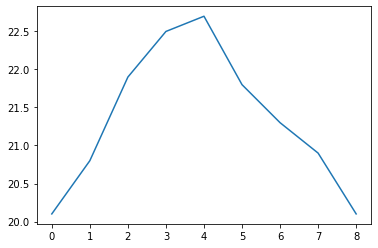

In [7]:
# Grafische Darstellung
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(T)
plt.show()

In [8]:
# Eine Implementierung mittels Python-Liste ist ebenfalls möglich mithilfe der sogenannten 
# Listenabstraktion (aber umständlicher)
fvalues = [ x*9/5 + 32 for x in tvalues] 
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 72.86, 71.24000000000001, 70.34, 69.62, 68.18]


weitere Vorteile von NumPy-Arrays sind ein **geringerer Speicherverbrauch** und ein **besseres Laufzeitverhalten**

## Erzeugen von arrays

**arange** liefert gleichmäßig verteilte Werte innerhalb eines gegebenen Intervalles zurück


#### Syntax von arange

arange([start,] stop[, step], [, dtype=None])

Die Werte werden innerhalb des halb-offenen Intervalles [start, stop) generiert. Wird diese Funktion mit Integer-Werten benutzt, ist sie beinahe äquivalent zu der built-in Python-Funktion range. arange liefert jedoch ein ndarray zurück, während range einen Listen-Iterator zurückliefert. 

Falls der start-Parameter nicht übergeben wird, wird start auf 0 gesetzt. Das Ende des Intervalls wird durch den Parameter stop bestimmt. Üblicherweise wird das Intervall diesen Wert nicht beinhalten, außer in den Fällen, in denen step keine Ganzzahl ist und floating-point-Effekte die Länge des Ausgabearrays beeinflussen.

Der Abstand zwischen zwei benachbarten Werten des Ausgabearrays kann mittels des optionalen Parameters step gesetzt werden. Der Default-Wert für step ist 1.

Falls ein Wert für step angegeben wird, kann der start-Parameter nicht mehr optional sein, d.h. er muss dann auch angegeben werden.

Der Typ des Ausgabearrays kann mit dem Parameter dtype bestimmt werden. Wird er nicht angegeben, wird der Typ automatisch aus den übergebenen Eingabewerten ermittelt.

In [9]:
import numpy as np
a = np.arange(1, 7)
print(a)
# im Vergleich dazu nun range:
x = range(1, 7)
print(x)    # x ist ein Iterator
print(list(x))
# weitere arange-Beispiele:
x = np.arange(7.3)
print(x)
x = np.arange(0.5, 6.1, 0.8)
print(x)
x = np.arange(0.5, 6.1, 0.8, int)
print(x)

[1 2 3 4 5 6]
range(1, 7)
[1, 2, 3, 4, 5, 6]
[0. 1. 2. 3. 4. 5. 6. 7.]
[0.5 1.3 2.1 2.9 3.7 4.5 5.3]
[0 1 2 3 4 5 6]


#### Syntax von linspace

linspace(start, stop, num=50, endpoint=True, retstep=False)

**linspace** liefert ein ndarray zurück, welches aus 'num' gleichmäßig verteilten Werten aus dem geschlossenen Interval ['start', 'stop'] oder dem halb-offenen Intervall ['start', 'stop') besteht. Ob ein geschlossenes oder ein halb-offenes Intervall zurückgeliefert wird, hängt vom Wert des Parameters endpoint ab. stop ist der letzte Wert des Intervalls, falls endpoint nicht auf False gesetzt ist. Die Schrittweite ist unterschiedlich, je nachdem, ob endpoint True oder False ist:

In [10]:
import numpy as np
# 50 Werte (Default) zwischen 1 und 10:
print(np.linspace(1, 10))
# 7 Werte zwischen 1 und 10:
print(np.linspace(1, 10, 7))
# jetzt ohne Endpunkt:
print(np.linspace(1, 10, 7, endpoint=False))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


### Nulldimensionale Arrays in NumPy

In NumPy kann man mehrdimensionale Arrays erzeugen. Skalare sind 0-dimensional. Im folgenden Beispiel erzeugen wir den Skalar 42. Wenden wir die ndim-Methode auf unseren Skalar an, erhalten wir die Dimension des Arrays. Wir können außerdem sehen, dass das Array vom Typ numpy.ndarray ist.

In [11]:
import numpy as np
x = np.array(42)
print("x: ", x)
print("Typ von x: ", type(x))
print("Dimension von x:", np.ndim(x))

x:  42
Typ von x:  <class 'numpy.ndarray'>
Dimension von x: 0


### Eindimensionales Array

Wir haben bereits in unserem anfänglichen Beispiel ein eindimensionales Array (besser als Vektor bekannt) gesehen. Weiterhin gilt, dass NumPy-Arrays Container sind, die nur einen Typ enthalten können, also beispielsweise nur Integers. Den homogenen Datentyp eines Arrays können wir mit dem Attribut dtype bestimmen, wie wir im folgenden Beispiel sehen können:

In [12]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
V = np.array([3.4, 6.9, 99.8, 12.8])
print("F: ", F)
print("V: ", V)
print("Typ von F: ", F.dtype)
print("Typ von V: ", V.dtype)
print("Dimension von F: ", np.ndim(F))
print("Dimension von V: ", np.ndim(V))

F:  [ 1  1  2  3  5  8 13 21]
V:  [ 3.4  6.9 99.8 12.8]
Typ von F:  int64
Typ von V:  float64
Dimension von F:  1
Dimension von V:  1


### Zwei- und Mehrdimensionale Arrays

Natürlich sind die Arrays in NumPy nicht auf eine Dimension beschränkt. Sie können eine beliebige Anzahl von Dimensionen haben. Wir erzeugen sie, indem wir verschachtelte Listen (oder Tupel) an die array-Methode von NumPy übergeben:

In [13]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A)
print(A.ndim)

[[ 3.4  8.7  9.9]
 [ 1.1 -7.8 -0.7]
 [ 4.1 12.3  4.8]]
2


### Shape/Gestalt eines Arrays

Die Funktion **shape** liefert die Größe bzw. die Gestalt eines Arrays in Form eines Integer-Tupels zurück. Diese Zahlen bezeichnen die Längen der entsprechenden Array-Dimensionen, d.h. im zweidimensionalen Fall den Zeilen und Spalten. In anderen Worten: Die Gestalt oder Shape eines Arrays ist ein Tupel mit der Anzahl der Elemente pro Achse (Dimension). In unserem Beispiel ist die Shape gleich (6, 3). Das bedeutet, das wir sechs Zeilen und drei Spalten haben. 

In [14]:
x = np.array([ [67, 63, 87],
               [77, 69, 59],
               [85, 87, 99],
               [79, 72, 71],
               [63, 89, 93],
               [68, 92, 78]])
print(np.shape(x))

# Es gibt auch eine äquivalente Array-Property:

print(x.shape)


(6, 3)
(6, 3)


Die Shape eines Arrays sagt uns auch etwas über die Reihenfolge, in der die Indizes ausgeführt werden, d.h. zuerst die Zeilen, dann die Spalten und dann gegebenenfalls eine weitere Dimension oder weitere Dimensionen.

**shape** kann auch dazu genutzt werden, die "Shape" eines Arrays zu ändern:

In [15]:
x.shape = (3, 6)
print(x)

x.shape = (2, 9)
print(x)

# Wichtig: die neue Shape muss der Anzahl der Elemente des Arrays entsprechen, 
# d.h. die totale Größe des neuen Arrays muss die gleiche wie die alte sein
# z.B. ist x.shape = (4, 4) nicht möglich

[[67 63 87 77 69 59]
 [85 87 99 79 72 71]
 [63 89 93 68 92 78]]
[[67 63 87 77 69 59 85 87 99]
 [79 72 71 63 89 93 68 92 78]]


Im Folgenden sehen wir die Shape eines dreidimensionalen Arrays:

In [16]:
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B.shape)
print(B[1][1][0])

(3, 2, 2)
221


### Indizierung und Teilbereichsoperator

Der Zugriff oder die Zuweisung an die Elemente eines Arrays funktioniert ähnlich wie bei den sequentiellen Datentypen von Python, d.h. den Listen und Tupeln. Außerdem haben wir verschiedene Möglichkeiten zu indizieren. Dies macht das Indizieren in NumPy sehr mächtig und ähnlich zum Indizieren und dem Teilbereichsoperator der Listen.

Einzelne Elemente zu indizieren, funktioniert so, wie es die meisten wahrscheinlich erwarten:

In [17]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
# Ausgabe des ersten Elements von F
print(F[0])
# Ausgabe letztes Element von F
print(F[-1])

1
21


Mehrdimensionale Arrays indizieren:  
Wir greifen zu auf das Element in der zweiten Zeile (Index 1) und der ersten Spalte (Index 0). 

In [18]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A[1][0])
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B[0][1][0])

# Oder: Effizientere Alternative: Wir benutzen nur ein Klammernpaar, und alle Indizes werden 
# mit Kommas separiert:

print (A[1, 0])
print (B[0, 1, 0])


1.1
121
1.1
121


Die allgemeine Syntax für die Nutzung von **Teilbereichsoperatoren** (slicing) für den eindimensionalen Fall lautet wie folgt:

[start:stop:step]

Wir demonstrieren die Arbeitsweise des Teilbereichsoperators an einigen Beispielen und beginnen mit dem einfachsten Fall, also dem eindimensionalen Array:

In [19]:
import numpy as np
S = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(S[2:5])
print(S[:4])
print(S[6:])
print(S[:])

[2 3 4]
[0 1 2 3]
[6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Die Anwendung des Teilbereichsoperators auf mehrdimensionale Arrays illustrieren wir in den folgenden Beispielen.   
Die Bereiche für jede Dimension werden durch Kommas getrennt:

In [20]:
A = np.array([
[11, 12, 13, 14, 15],
[21, 22, 23, 24, 25],
[31, 32, 33, 34, 35],
[41, 42, 43, 44, 45],
[51, 52, 53, 54, 55]])
print(A[:3, 2:])

[[13 14 15]
 [23 24 25]
 [33 34 35]]


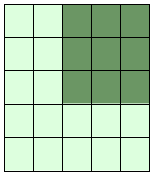

In [21]:
print(A[3:, :])

[[41 42 43 44 45]
 [51 52 53 54 55]]


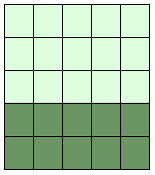

In [22]:
print(A[:, 4:])

[[15]
 [25]
 [35]
 [45]
 [55]]


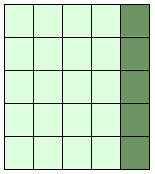

Die folgenden beiden Beispiele benutzten auch noch den dritten Parameter step. Die reshape-Funktion benutzen wir, um ein eindimensionales Array in ein zweidimensionales zu wandeln. 

In [23]:
X = np.arange(28).reshape(4, 7)
print(X)

# und nun jedes dritte Element in jeder zweiten Zeile
print("Und nun jedes dritte Element in jeder zweiten Zeile")
print(X[::2, ::3])

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]
Und nun jedes dritte Element in jeder zweiten Zeile
[[ 0  3  6]
 [14 17 20]]


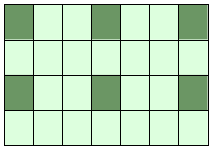

In [24]:
# oder jedes dritte Element in jeder Zeile
print(X[::, ::3])

[[ 0  3  6]
 [ 7 10 13]
 [14 17 20]
 [21 24 27]]


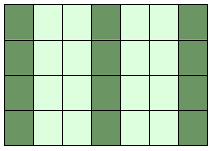

### Dreidimensionale Arrays

Dreidimensionale Arrays sind vom Zugriff her etwas schwerer vorstellbar. Betrachten wir dazu das folgende Beispielarray:

In [25]:
import numpy as np
X = np.array(
    [[[3, 1, 2],
      [4, 2, 2]],
     [[-1, 0, 1],
      [1, -1, -2]],
     
     [[3, 2, 2],
      [4, 4, 3]],
     [[2, 2, 1],
      [3, 1, 3]]])
print(X)
print(X.shape)

[[[ 3  1  2]
  [ 4  2  2]]

 [[-1  0  1]
  [ 1 -1 -2]]

 [[ 3  2  2]
  [ 4  4  3]]

 [[ 2  2  1]
  [ 3  1  3]]]
(4, 2, 3)


Wir sehen, dass dieses Array eine Shape (4, 2, 3) hat. Wir benutzen nun die Slicing-Funktionalität, um uns die Schnitte durch die Dimensionen zu veranschaulichen:

In [26]:
print("Dimension 0 with size ", X.shape[0])
for i in range(X.shape[0]):
    print(f"\nAusgabe von X[{i:1},:,:]:")
    print(X[i,:,:])
    
print("\nDimension 1 with size ", X.shape[1])
for i in range(X.shape[1]):
    print(f"\nAusgabe von X[:,{i:1},:]:")
    print(X[:,i,:])
    
print("\nDimension 2 with size ", X.shape[2])
for i in range(X.shape[2]):
    print(f"\nAusgabe von X[:,:,{i:1}]:")
    print(X[:,:,i])

Dimension 0 with size  4

Ausgabe von X[0,:,:]:
[[3 1 2]
 [4 2 2]]

Ausgabe von X[1,:,:]:
[[-1  0  1]
 [ 1 -1 -2]]

Ausgabe von X[2,:,:]:
[[3 2 2]
 [4 4 3]]

Ausgabe von X[3,:,:]:
[[2 2 1]
 [3 1 3]]

Dimension 1 with size  2

Ausgabe von X[:,0,:]:
[[ 3  1  2]
 [-1  0  1]
 [ 3  2  2]
 [ 2  2  1]]

Ausgabe von X[:,1,:]:
[[ 4  2  2]
 [ 1 -1 -2]
 [ 4  4  3]
 [ 3  1  3]]

Dimension 2 with size  3

Ausgabe von X[:,:,0]:
[[ 3  4]
 [-1  1]
 [ 3  4]
 [ 2  3]]

Ausgabe von X[:,:,1]:
[[ 1  2]
 [ 0 -1]
 [ 2  4]
 [ 2  1]]

Ausgabe von X[:,:,2]:
[[ 2  2]
 [ 1 -2]
 [ 2  3]
 [ 1  3]]


### Arrays mit Nullen und Einsen

Arrays können auf zwei Arten mit **Nullen** und **Einsen** initialisiert werden. Die Methode ones(t) hat als Parameter ein Tupel t mit der Shape des Arrays und erzeugt entsprechend ein Array mit Einsen. Defaultmäßig wird es mit Float-Einsen gefüllt. Wenn man Integer-Einsen benötigt, kann man den optionalen Parameter dtype auf int setzen:

In [27]:
import numpy as np
E = np.ones((2, 3))
print(E)
F = np.ones((3, 4), dtype=int)
print(F)

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


Was wir über die Methode **ones** gesagt haben, gilt analog auch für die Methode **zeros**:

In [28]:
Z = np.zeros((2, 4))
print(Z)
Z = np.zeros((2, 4), dtype=int)
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0 0 0 0]
 [0 0 0 0]]


Es gibt noch eine andere interessante Möglichkeit, ein Array mit Einsen oder Nullen zu erzeugen, wenn es die gleiche Shape wie ein anderes existierendes Array 'a' haben soll. Für diesen Zweck stellt NumPy die Methoden **ones_like** und **zeros_like** zur Verfügung:

In [29]:
x = np.array([2, 5, 18, 14, 4])
E = np.ones_like(x)
print(E)
Z = np.zeros_like(x)
print(Z)

[1 1 1 1 1]
[0 0 0 0 0]


## Arrays kopieren


### numpy.copy(A) und A.copy()

Zum Kopieren eines NumPy-Arrays A gibt es generell zwei Möglichkeiten:

    numpy.copy(A)
    A.copy()

Beide sind nahezu gleich und liefern jeweils eine Kopie des Arrays A zurück. Sie unterscheiden sich aber beim Defaultwert des optionalen Parameters order. Bei numpy.copy(obj) steht der Defaultwert auf order='K', und bei obj.copy() steht er auf order='C'.  

    Parameter 	Bedeutung
        obj       array-ähnliche Eingabedaten
        order 	Die möglichen Werte sind {'C', 'F', 'A', 'K'}.   
        
Der Parameter *order* kontrolliert das Speicher-Layout der Kopie.  
'C' bedeutet C-Reihenfolge oder C-zusammenhängend, 'F' Fortran-zusammenhängend, 'A' verhält sich wie 'F', falls das   
Objekt 'obj' in Fortran-Reihenfolge ist, ansonsten verhält sich 'A' wie 'C'. 'K' bedeutet, dass das Layout von 'obj'   
so nahe wie möglich realisiert werden soll.
    
    
### Zusammenhängend gespeicherte Arrays

Um den Parameter *order* zu verstehen, gehen wir noch kurz auf den Begriff "zusammenhängend" (englisch "contiguous") ein. Die Speicherstruktur eines Arrays wird als zusammenhängend bezeichnet, wenn die Speicherung eines Arrays entweder C-zusammenhängend (C_CONTIGUOUS) oder Fortran-zusammenhängend (F_CONTIGUOUS) erfolgt. Betrachten wir dazu folgendes Array:

In [30]:
import numpy as np
F = np.array([[11, 12, 13, 14], 
              [21, 22, 23, 24],
              [31, 32, 33, 34]], order='F')
C = F.copy()
C2 = np.copy(F)
print("F array: \n", F)
print("C array: \n", C)
print("Ist F 'C contiguous?': ", F.flags['C_CONTIGUOUS'])
print("Ist C 'C contiguous?': ", C.flags['C_CONTIGUOUS'])
print("Ist C 'C contiguous?': ", C2.flags['C_CONTIGUOUS'])

F array: 
 [[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
C array: 
 [[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
Ist F 'C contiguous?':  False
Ist C 'C contiguous?':  True
Ist C 'C contiguous?':  False


## Identitäts-Array

In der linearen Algebra versteht man unter der Identitätsmatrix oder Einheitsmatrix eine quadratische Matrix, deren Hauptdiagonalelemente eins und deren Außerdiagonalelemente null sind.

NumPy bietet zwei Möglichkeiten, solche Arrays zu erzeugen:

    identy
    eye


### Die identity-Funktion

Wir können Identitäts-Arrays mit der Funktion *identity* generieren:

**identity(n, dtype=None)**  

    Parameter 	Bedeutung
    n 	        Eine Integer-Zahl, welche die Anzahl der Zeilen und Spalten der Ausgabe                   
                  definiert, d.h. 'n' x 'n'
    dtype 	    Ein optionales Argument, welches den Datentyp des Ergebnisses definiert.  
                  Der Default ist 'float'

Die Ausgabe von identity ist ein n x n-Array, in dem die Elemente auf der Hauptdiagonalen auf 1 gesetzt sind und alle anderen Elemente auf 0.

In [31]:
import numpy as np
A = np.identity(4)
B = np.identity(4, dtype=int)
print("A array: \n", A)
print("B array: \n", B)


A array: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
B array: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


### Die eye-Funktion

Die Funktion *eye* bietet eine andere Möglichkeit, Identitätsarrays, aber auch allgemeine Diagonalarrays, mit Einsen zu erzeugen. Die Ausgabe von eye ist ein zweidimensionales Array, in dem die Elemente auf der Hauptdiagonalen auf 1 gesetzt sind (bei k=0) und alle anderen Elemente auf 0. Mit unterschiedlichen k lässt sich die Diagonale "verschieben".

**eye(N, M=None, k=0, dtype=float)**

In [32]:
import numpy as np
print(np.eye(5, 8, k=1, dtype=int))

[[0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]]


### Datentyp-Objekt: dtype

#### dtype

Das Datentypobjekt 'dtype' ist eine Instanz der numpy.dtype-Klasse. Es kann mit *numpy.dtype* konstruiert werden.

Bis jetzt haben wir in unseren Beispielen von NumPy-Arrays nur grundlegende numerische Typen wie 'int' und 'float' benutzt. Diese NumPy-Arrays enthielten nur homogene Datentypen. dtype-Objekte werden aus einer Kombination von grundlegenden Datentypen erzeugt. Mit Hilfe von dtype sind wir in der Lage "Strukturierte Arrays" zu erzeugen (auch bekannt als "record arrays") und somit verschiedene Datentypen in verschiedenen Spalten zu haben. Es gibt somit Ähnlichkeit zu Excel- oder CSV-Dokumenten. 

#### Strukturierte Arrays

*ndarrays* sind homogene Datenobjekte, d.h. alle Elemente eines Arrays haben den gleichen Datentyp. Der Datentyp dtype hingegen erlaubt es uns, spaltenweise Typen zu deklarieren.

Wir wollen eine Tabelle europäischer Länder mit den Informationen über Fläche, Bevölkerung und Bevölkerungsdichte generieren.

Wir erzeugen ein strukturiertes Array mit den Spalten "country" (String), "density" (float), "area" (int) und "population"(int). Die Struktur dafür haben wir vorher in dt definiert:

In [33]:
dt = np.dtype([('country', 'S20'), 
               ('density', 'f'), 
               ('area', 'i4'), 
               ('population', 'i4')])
population_table = np.array([('Netherlands', 393, 41526, 16928800),
('Belgium', 337, 30510, 11007020),
('United Kingdom', 256, 243610, 62262000),
('Germany', 233, 357021, 81799600),
('Liechtenstein', 205, 160, 32842),
('Italy', 192, 301230, 59715625),
('Switzerland', 177, 41290, 7301994),
('Luxembourg', 173, 2586, 512000),
('France', 111, 547030, 63601002),
('Austria', 97, 83858, 8169929),
('Greece', 81, 131940, 11606813),
('Ireland', 65, 70280, 4581269),
('Sweden', 20, 449964, 9515744),
('Finland', 16, 338424, 5410233),
('Norway', 13, 385252, 5033675)],dtype=dt)
print(population_table['density'])
print(population_table['country'])
print(population_table['area'][2:5])

[393. 337. 256. 233. 205. 192. 177. 173. 111.  97.  81.  65.  20.  16.
  13.]
[b'Netherlands' b'Belgium' b'United Kingdom' b'Germany' b'Liechtenstein'
 b'Italy' b'Switzerland' b'Luxembourg' b'France' b'Austria' b'Greece'
 b'Ireland' b'Sweden' b'Finland' b'Norway']
[243610 357021    160]


### Numerische Operationen auf NumPy-Arrays

#### Operatoren und Skalare

Skalare Grundoperationen

In [34]:
import numpy as np
lst = [2, 3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9]
# man wandelt die Liste zuerst in ein NumPy-Array um
v = np.array(lst)

# Addition
print(v + 2)

# Multiplikation
print(v * 2.2)

# Exponentiation
print(v ** 2)

[ 4.    5.    9.9   5.3   8.9   2.11 12.3  14.9 ]
[ 4.4    6.6   17.38   7.26  15.18   0.242 22.66  28.38 ]
[4.0000e+00 9.0000e+00 6.2410e+01 1.0890e+01 4.7610e+01 1.2100e-02
 1.0609e+02 1.6641e+02]


Ausgehend von einer Liste (s.o) könnte man natürlich auch folgendermaßen vorgehen:

In [35]:
lst = [2,3, 7.9, 3.3, 6.9, 0.11, 10.3, 12.9]
res = []
for val in lst:
    res.append(val + 2)
print(res)

[4, 5, 9.9, 5.3, 8.9, 2.11, 12.3, 14.9]


Oder eleganter mittels Listenabstraktion (list comprehension):

In [36]:
res = [ val + 2 for val in lst]
print(res)

[4, 5, 9.9, 5.3, 8.9, 2.11, 12.3, 14.9]


Die NumPy-Lösung ist allerdings um mehrere 10er-Potenzen schneller  
#### Arithmetische Operationen auf zwei Arrays
Falls wir ein weiteres Array statt eines Skalars benutzen, werden die Elemente beider Arrays komponentenweise miteinander verknüpft.  
ACHTUNG: Die Operation **(A * B)** im folgenden darf man dabei aber **nicht** mit einer **Matritzenmultiplikation** verwechseln!

In [37]:
import numpy as np
A = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
B = np.array([[5, 4, 2], [1, 0, 2], [3, 8, 2]])
print("Addition zweier Arrays: ")
print(A + B)
print("\nMultiplikation zweier Arrays: ")
print(A * B)

Addition zweier Arrays: 
[[16 16 15]
 [22 22 25]
 [34 40 35]]

Multiplikation zweier Arrays: 
[[ 55  48  26]
 [ 21   0  46]
 [ 93 256  66]]


#### Matrizenmultiplikation und Skalarprodukt
##### Definition der dot-Funktion
In englischen Texten wird häufig bei dieser NumPy-Funktionalität vom "dot product" gesprochen. Mathematisch versteht man unter dem "dot product" das Skalarprodukt oder "innere Produkt" von zwei Vektoren.  
Da das Skalar- oder Punktprodukt in der Mathematik üblicherweise nur für den eindimensionalen Fall bei Vektoren definiert ist und die dot-Funktion von NumPy aber auf beliebige Funktionen angewendet werden kann, sprechen wir von dot-Funktion, um Verwechslungen zur Mathematik vorzubeugen.

Die Syntax der dot-Funktion sieht wie folgt aus:

**dot(a, b, out=None)**

Die Funktion **dot** liefert das dot-Produkt von a und b zurück.

Falls sowohl a als auch b Skalare sind oder beide eindimensionale Arrays, wird ein Skalar zurückgegeben, ansonsten ein Array.
Für eindimensionale Arrays entspricht es dem Skalarprodukt.
Für zweidimensionale Arrays entspricht das dot-Produkt der Matrizenmultiplikation.  
##### Beispiele zur dot-Funktion
Wir beginnen mit den Fällen, in denen beide Argumente Skalare oder eindimensionale Arrays sind:



In [38]:
import numpy as np
print(np.dot(3, 4))
x = np.array([3])
y = np.array([4])
print(x.ndim)
print(np.dot(x, y))
x = np.array([3, -2])
y = np.array([-4, 1])
print(np.dot(x, y))

12
1
12
-14


Im zweidimensionalen Fall realisiert die dot-Funktion die Matrizenmultiplikation.  
Betrachten wir dazu folgendes Beispiel:

In [39]:
import numpy as np
A = np.array([[11, 12, 13, 14], 
              [21, 22, 23, 24], 
              [31, 32, 33, 34]])
B = np.array([[5, 4, 2], 
              [1, 0, 2], 
              [3, 8, 2], 
              [24, 12, 57]])
print(np.dot(A, B))

[[ 442  316  870]
 [ 772  556 1500]
 [1102  796 2130]]


Seit Python 3.5 gibt es für das dot-Produkt auch einen speziellen Infix-Operator, und zwar @:

In [40]:
print(A @ B)

[[ 442  316  870]
 [ 772  556 1500]
 [1102  796 2130]]


Dabei ist natürlich klar, dass die Anzahl der Spalten des ersten zweidimensionalen Arrays gleich der Anzahl der Zeilen des zweiten zweidimensionalen Arrays sein muss. Das kann man folgendermaßen testen (A.shape [-1] bedeutet Anzahl der Spalten, B.shape [-2] Anzahl der Zeilen)

In [41]:
# es muss gelten:
print(A.shape[-1] == B.shape[-2]) 

True


#### Vergleichsoperatoren

Wir kennen bereits Vergleichsoperatoren in Python, die wir auf Integer, Floats oder Strings angewendet haben. Sie liefern True oder False zurück. Vergleichen wir zwei Arrays miteinander, erhalten wir keinen "einfachen" Booleschen Wert zurück. Die Vergleiche werden elementweise durchgeführt. Dies bewirkt, dass wir ein Boolesches Array als Rückgabewert erhalten:

In [42]:
import numpy as np
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([ [11, 102, 13], [201, 22, 203], [31, 32, 303] ])
print(A == B)

[[ True False  True]
 [False  True False]
 [ True  True False]]


Man kann aber auch Arrays vollständig auf Gleichheit überprüfen. Dazu benutzen wir die Funktion **array_equal**, die True zurückliefert, falls zwei Arrays die gleiche Shape haben und alle Elemente gleich sind. Ansonsten wird False zurückgeliefert.

In [43]:
print(np.array_equal(A, B))
print(np.array_equal(A, A))

False
True


#### Logische Operatoren

Wir können Arrays auch komponentenweise mittels logischem 'oder' bzw. logischem 'und' verknüpfen. Dazu gibt es die Funktionen **logical_or** bzw. **logical_and**.

In [44]:
a = np.array([ [True, True], [False, False]])
b = np.array([ [True, False], [True, False]])
print(np.logical_or(a, b))
print(np.logical_and(a, b))

[[ True  True]
 [ True False]]
[[ True False]
 [False False]]


Eine weitere interessante Funktionalität ist das sog. **broadcasting**, womit arrays mit unterschiedlichen shapes miteinander verknüpft werden können (hier nicht näher erläutert). 

## Zufallszahlen mit Python

### Die Module random und secrets

Das Modul secrets wurde erst mit Python 3.6 neu eingeführt. Mit diesem Modul kann man kryptografisch starke Pseudozufallszahlen erzeugen, die sich als Passwörter, Tokens oder Ähnliches eignen. Das random-Modul von Python wurde nicht in Hinblick auf kryptografische Anwendungen entwickelt. Der Fokus dieses Moduls lag auf Modellbildungen und Simulationen.
Mit der Funktion random.random können wir eine Zufallszahl im halb-offenen Intervall [0, 1) erzeugen:

In [45]:
import random
random_number = random.random()
print(random_number)

0.03240598073833367


Nun wollen wir eine kryptografisch starke Zufallszahl erzeugen:

In [46]:
from secrets import SystemRandom
# from random import SystemRandom ist dazu äquivalent
crypto = SystemRandom()
print(crypto.random())

0.7192362058758092


### Erzeugen einer Liste von Zufallszahlen

Häufig benötigen wir mehr als eine Zufallszahl. Die folgende Funktion random_list kann eine Liste von Zufallszahlen mit vorgegebener Anzahl erzeugen. Mit dem Parameter secure können wir steuern, ob wir sichere, also mit SystemRandom erzeugte Zahlen wollen. Der Preis für die höhere Sicherheit liegt in einer deutlich höheren Rechenzeit.

In [47]:
import random
def random_list(n, secure=True):
    random_floats = []
    if secure:
        crypto = random.SystemRandom()
        random_float = crypto.random
    else:
        random_float = random.random
    for _ in range(n):
        random_floats.append(random_float())
    return random_floats
print(random_list(3, secure=False))

[0.008297495796697585, 0.01591634171470324, 0.14721141266706328]


Am einfachsten, was den Programmieraufwand betrifft, und am schnellsten, was die Laufzeit betrifft, lassen sich Zufallszahlen mit dem random-Untermodul von numpy erzeugen. Allerdings werden auch hier keine sicheren Zufallszahlen erzeugt!

In [48]:
import numpy as np
print(np.random.random(10))

[0.04026093 0.7136751  0.66745645 0.29312212 0.16980046 0.71568284
 0.76189119 0.69652077 0.60714255 0.56552646]


Wenn man zufällige Integer-Zahlen erzeugen möchte, empfiehlt es sich, die Funktion randint zu nutzen, die die Module random, secrets und numpy.random bietet (Bsp. Würfel 1...6).

In [49]:
import random
# randint
outcome = random.randint(1, 6)
print(outcome)

import secrets
c = secrets.SystemRandom()
print(c.randint(1, 6))

6
4


Würfeln wir sehr oft, so sollte jede Augenzahl ungefähr in einem Sechstel der Fälle auftreten. Wir testen dies im Folgenden. Das Zählen erledigen wir mit der Counter-Klasse aus dem collections-Modul:

In [50]:
from collections import Counter
import random
c = Counter()
anzahl_wuerfe = 100000
for wurf in range(anzahl_wuerfe):
    augenzahl = random.randint(1, 6)
    c[augenzahl] += 1
    
print(c)
for augenzahl in c:
    print(f"Augenzahl: {augenzahl}, \
          relative Häufigkeit: {c[augenzahl]/anzahl_wuerfe}")

Counter({5: 16757, 1: 16718, 3: 16681, 4: 16663, 2: 16592, 6: 16589})
Augenzahl: 2,           relative Häufigkeit: 0.16592
Augenzahl: 3,           relative Häufigkeit: 0.16681
Augenzahl: 1,           relative Häufigkeit: 0.16718
Augenzahl: 5,           relative Häufigkeit: 0.16757
Augenzahl: 4,           relative Häufigkeit: 0.16663
Augenzahl: 6,           relative Häufigkeit: 0.16589


Obiges Beispiel lässt sich mit der random-Funktion aus dem NumPy-Modul einfacher realisieren, wobei zu beachten ist, dass im Gegensatz zur Python-Funktion **random.randint** die NumPy-Funktion **np.random.randint** zufällige Werte aus einem halboffenen Intervall [1,7) liefert.

In [51]:
import numpy as np
from collections import Counter
anzahl_wuerfe = 100000
outcome = np.random.randint(1, 7, size=anzahl_wuerfe)
c = Counter(outcome)
for augenzahl in c:
    print(f"Augenzahl: {augenzahl}, \
          relative Häufigkeit: {c[augenzahl]/anzahl_wuerfe}")

Augenzahl: 4,           relative Häufigkeit: 0.16802
Augenzahl: 1,           relative Häufigkeit: 0.1682
Augenzahl: 5,           relative Häufigkeit: 0.16548
Augenzahl: 6,           relative Häufigkeit: 0.16602
Augenzahl: 3,           relative Häufigkeit: 0.16606
Augenzahl: 2,           relative Häufigkeit: 0.16622


### Stichproben/Auswahlen

**choice** ist eine weitere extrem nützliche Funktion des random-Moduls. Sie kann genutzt werden, um aus einer nicht-leeren Sequenz ein zufälliges Element zu wählen.

Sequenzen können beispielsweise Listen, Strings und Tupels sein, aber auch Iteratoren. Das bedeutet, wir sind in der Lage, aus einem String ein zufälliges Zeichen zu holen oder ein zufälliges Element aus einer Liste oder einem Tupel:

In [52]:
from random import choice
professions = ["scientist", "philosopher", "engineer", "priest"]
print(choice("abcdefghij"))
print(choice(professions))
print(choice(("apples", "bananas", "cherries")))
print(choice(range(10)))

d
engineer
bananas
5


**choice** liefert zufällig ein Objekt aus einer nicht-leeren Sequenz, wobei die Chancen für die Elemente, ausgewählt zu werden, gleichmäßig verteilt sind. Für praktische Anwendungen benötigt man hier jedoch häufig eine andere (wählbare) Verteilung.

### Stichproben mit Python


Eine Sample oder Stichprobe kann als ein repräsentativer Teil einer größeren Gruppe angesehen werden, die wir "Population" nennen.

Das Modul *numpy.random* beinhaltet die Funktion **random_sample**, die zufällige Float-Werte im halb-offenen Intervall [0.0, 1.0) liefert. Die Ergebnisse sind gleichmäßig über das angegebene Intervall verteilt. Die Funktion erwartet lediglich einen Parameter size, der die Shape der Ausgabe definiert. Wenn wir die size zum Beispiel mit (3, 4) angeben, erhalten wir ein Array mit der Shape (3, 4), das mit Zufallswerten gefüllt ist:

In [53]:
import numpy as np
x = np.random.random_sample((3, 4))
print(x)

[[0.86735659 0.96041019 0.8755326  0.20525809]
 [0.26837425 0.80819829 0.0565973  0.35590454]
 [0.11146782 0.00121533 0.8012569  0.97131003]]


Wenn random_sample mit einem Integer-Wert aufgerufen wird, erhalten wir ein eindimensionales Array. Ein Integer-Wert bewirkt den gleichen Effekt, wie ein einfaches Tupel als Argument:

In [54]:
x = np.random.random_sample(7)
print(x)
y = np.random.random_sample((7,))
print(y)


[0.20948972 0.09133032 0.89561959 0.26965431 0.21788863 0.09810542
 0.17875787]
[0.16669991 0.34497505 0.10858471 0.18790927 0.21620331 0.00563141
 0.82445658]


Es können ebenfalls Arrays aus einem beliebigen Intervall [a, b) generiert werden, wobei a kleiner als b sein muss. Das kann wie folgt aussehen:

**(b - a) * random_sample() + a**

Beispiel:

In [55]:
a = -3.4
b = 2
A = (b - a) * np.random.random_sample((3, 4)) + a
print(A)

[[ 0.5335604   1.09583416 -2.42339495  0.54642748]
 [ 0.83127188 -1.08261434 -2.80214741 -2.38334769]
 [ 1.63096555  0.52832078 -0.02516575  1.66396767]]


Das Standard-Modul *random* von Python hat eine allgemeinere Funktion sample, die Stichproben einer Population produziert. Die Population ist eine Sequenz, also beispielsweise eine Liste, Menge oder ein String.

Die Syntax von sample:

**sample(population, k)**

Die Funktion erstellt eine Liste, die k Elemente aus der population beinhaltet. Die Ergebnisliste beinhaltet keine Duplikate, wenn in der Population keine Duplikate vorkommen.

Wenn eine Sample aus einer Range von Integer-Werten ausgewählt werden soll, dann können -- oder besser sollten -- Sie *range* als Argument für die Population verwenden.

Im folgenden Beispiel ziehen wir sechs Zahlen aus der Range zwischen 1 und 49 (inklusive). Das entspricht einer Lotto-Ziehung in Deutschland:

In [56]:
import random
print(random.sample(range(1, 50), 6))

[1, 36, 10, 12, 43, 32]


### Echte Zufallszahlen

Zur Erzeugung echter Zufallszahlen kann man physikalische Phänomene nutzen, z. B. radioaktive Zerfallsprozesse oder das Rauschen elektronischer Bauelemente. Aber es geht auch einfacher. Beispielsweise durch Werfen einer oder mehrerer Münzen oder unter Benutzung von Würfeln. Diese Verfahren sind jedoch einerseits zeitaufwendig oder technisch kompliziert zu bewerkstelligen.

Das **random**-Modul von Python liefert keine "echten" Zufallszahlen. Die meisten Programme liefern nur Zufallszahlen, die pseudozufällig sind. Die Zahlen werden in einer vorhersehbaren Art generiert, weil der verwendete Algorithmus deterministisch ist. Pseudozufallszahlen sind für viele Situation gut genug, aber sie sind nicht "wirklich" zufällig, wenn man beispielsweise Würfel- oder Lotterie-Ziehungen simulieren will.

### Seed/Startwert

#### Random Seed

Unter einem **"Seed Key"** oder einfach nur **Seed** versteht man den Startwert, mit dem ein Zufallszahlengenerator initialisiert wird. Startet man einen Algorithmus mit dem gleichen Seed-Wert, erhält man auch exakt die gleichen Pseudozufallszahlen. Zufällige Startwerte werden in vielen Programmiersprachen anhand des Systemstatus generiert, der meistens der Systemzeit entspricht.

Wenn die Funktion *random.seed* mit None oder keinem Argument aufgerufen wird, wird der Seedwert aus der aktuellen Systemzeit oder einer anderen systemspezifischen Zufallsquelle generiert.

In [57]:
import random
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10), end=", ")
    
print("\nNochmals die selben Zufallszahlen:")
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10), end=", ")

2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 
Nochmals die selben Zufallszahlen:
2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 

Die *seed*-Funktion liefert eine deterministische Sequenz von Zufallszahlen. Die Sequenz kann beliebig wiederholt werden, um beispielsweise bestimmte Situationen zu debuggen oder bei einer Serie von Simulationen mit gleichen Startbedingungen. Bei Verwendung von *seed* ohne Argument ergeben sich unterschiedliche Zufallszahlen.

In [58]:
import random
random.seed()
for _ in range(10):
    print(random.randint(1, 10))
    
print("\nDiesmal nicht die selben Zufallszahlen:")
random.seed()
for _ in range(10):
    print(random.randint(1, 10))

5
3
1
3
2
7
10
4
5
6

Diesmal nicht die selben Zufallszahlen:
2
4
3
1
6
2
8
9
6
9


### Gauss'sche Normalverteilung

Bei **random.gauss** und **random.normalvariate** handelt es sich um zwei verschiedene Implementierungen von Funktionen, die jeweils normalverteilte Zufallszahlen zurückliefern.

Wir möchten nun 1000 Zufallszahlen zwischen 130 und 230 generieren, die eine Gausssche Verteilung aufweisen mit dem Erwartungswert mu = 180 und der Standardabweichung sigma = 30.

Wenn wir uns die help-Information anschauen, sehen wir, dass der wesentliche Unterschied darin besteht, dass **gauss** etwas schneller ist und nicht Thread-sicher, während **random.normalvariate** Thread-sicher ist.

In [59]:
from random import gauss
n = 100
values = []
frequencies = {}
while len(values) < n:
    value = int(gauss(180, 30))
    if 130 < value < 230:
        frequencies[value] = frequencies.get(value, 0) + 1
        values.append(value)
print("\nZufallszahlen:")
print (values)
print("\nund deren Anzahlen:")
print (frequencies)


Zufallszahlen:
[202, 203, 184, 203, 148, 174, 200, 210, 229, 195, 173, 215, 203, 200, 165, 163, 215, 212, 164, 141, 206, 222, 179, 192, 186, 201, 186, 173, 164, 222, 181, 179, 180, 168, 162, 148, 145, 194, 178, 163, 204, 199, 131, 179, 192, 229, 216, 193, 187, 170, 187, 191, 200, 198, 194, 198, 194, 168, 161, 159, 131, 156, 171, 191, 195, 175, 163, 192, 200, 167, 195, 156, 211, 209, 186, 194, 216, 206, 213, 197, 188, 185, 205, 188, 194, 167, 214, 174, 166, 219, 211, 142, 192, 224, 219, 173, 214, 188, 182, 215]

und deren Anzahlen:
{202: 1, 203: 3, 184: 1, 148: 2, 174: 2, 200: 4, 210: 1, 229: 2, 195: 3, 173: 3, 215: 3, 165: 1, 163: 3, 212: 1, 164: 2, 141: 1, 206: 2, 222: 2, 179: 3, 192: 4, 186: 3, 201: 1, 181: 1, 180: 1, 168: 2, 162: 1, 145: 1, 194: 5, 178: 1, 204: 1, 199: 1, 131: 2, 216: 2, 193: 1, 187: 2, 170: 1, 191: 2, 198: 2, 161: 1, 159: 1, 156: 2, 171: 1, 175: 1, 167: 2, 211: 2, 209: 1, 213: 1, 197: 1, 188: 3, 185: 1, 205: 1, 214: 2, 166: 1, 219: 2, 142: 1, 224: 1, 182: 1}


## Lesen und Schreiben von Daten-Dateien
In Python und NumPy gibt es eine Vielzahl von Möglichkeiten, Daten zu lesen und zu schreiben. Wir wollen uns hier auf einige für uns wichtige konzentrieren.

### Text-Dateien speichern mit savetxt

Die ersten zwei Funktionen, die wir uns anschauen möchten, sind **savetxt** und **loadtxt**.

Im folgenden einfachen Beispiel definieren wir ein Array x und speichern es als Text-Datei mit savetxt:

In [60]:
import numpy as np
x = np.array([[1, 2], 
              [3, 4],
              [5, 6]], np.int32)
np.savetxt("test.txt", x)

Da das Array aus Integern besteht, hätte man hier eher eine Datei erwartet, in der ganze Zahlen und nicht Float-Zahlen stehen. Man kann aber das Ausgabeformat selbst bestimmen. Im Folgenden speichern wir das Array in der Datei test2.txt mit drei Nachkommastellen und in der Datei test3.txt als Integers mit vorangestellten Leerzeichen, wenn die Anzahl der Stellen kleiner als 4 ist. Dafür übergeben wir einen Format-String an den Parameter fmt. Im vorigen Beispiel haben wir gesehen, dass der Default-Delimiter ein Leerzeichen ist. Wir können das Verhalten anpassen, indem wir einen String dem Parameter delimiter mitgeben. In den meisten Fällen wird dies ein einzelnes Zeichen sein. Jedoch kann ebenso eine ganze Zeichensequenz übergeben werden, z.B. ein Smiley " :-)":


In [61]:
np.savetxt("test2.txt", x, fmt="%2.3f", delimiter=",")
np.savetxt("test3.txt", x, fmt="%04d", delimiter=" :-) ")


### Text-Dateien laden mit loadtxt

#### loadtxt mit und ohne Parameter (spezielle Trennzeichen)

Jetzt werden wir die Datei "test.txt" einlesen, die wir im vorigen Unterkapitel erstellt haben. Auch die Dateien mit den Trennzeichen werden entsprechend eingelesen.

In [62]:
# Einlesen ohne Trenner
x = np.loadtxt("test.txt")
print(x)
# Einlesen mit speziellem Trenner
y = np.loadtxt("test2.txt", delimiter=",")
print(y)
# Natürlich funktioniert das genauso mit Smiley
z = np.loadtxt("test3.txt", delimiter=" :-) ")
print(z)

[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


#### Selektives Einlesen von Spalten

Häufig ist es so, dass man aus einer solchen Datei nur bestimmte Spalten einlesen will. Zu diesem Zweck übergibt man dem Parameter *usecols* ein Tupel mit den gewünschten Spaltenindizes. Dabei beginnt die Nummerierung wie üblich mit dem Index 0. Um die Wirkungsweise des Parameters *usecols* besser demonstrieren zu könnten, erzeugen und speichern wir zuerst ein Array mit 6 Spalten:

In [63]:
import numpy as np
Z = np.random.randint(-10, 10, size=(4,10))
print(Z)
np.savetxt("test3.txt", Z, fmt="%1d", delimiter=" ")

[[-10  -8   4   8   2  -1   8  -5  -2  -1]
 [ -6  -1   7  -5   8   9   4 -10  -8  -9]
 [ -3   8   0  -1  -7   2  -2   8  -1   4]
 [  5   1   7   3   7  -5   9   0  -2   8]]


In [64]:
y = np.loadtxt("test3.txt", 
               delimiter=" ", 
               usecols=(0, 1, 6))
print(y)

[[-10.  -8.   8.]
 [ -6.  -1.   4.]
 [ -3.   8.  -2.]
 [  5.   1.   9.]]


### Beispiele für das Einlesen von Messdaten aus CSV-Dateien
Es ist zu beachten, dass einzulesende Daten zunächst Zeichenketten (Strings) repräsentieren, die (z.B. in integer oder float) umgewandelt werden müssen.

In [65]:
# Einlesen von durch Komma getrennten Daten
# aus einer Textdatei (ohne Zeilenumbruch)

#CSV-Datei öffnen
file=open("daten.txt")

#gesamte Datei einlesen
content=file.read()

#Datei schließen
file.close()

#Liste mit einzelnen Datensätzen erstellen
dataset=content.split("/n")

#Datensätze durchlaufen
for data in dataset:
    #einzelne Spalten extrahieren
    col=data.split(",")
    
col1=[float(x) for x in col]
col2=[2*x for x in col1]    

# Kontrollausdruck
print ("col=",col)
print ("col1=",col1)
print ("col2=",col2)


col= ['1.7', '10.003', '12.3', '2.0', '3', '4.1', '.45', '5.', '6.23', '7.01', '8', '9', '10', '23', '4', '5', '6', '7', '8', '9\n']
col1= [1.7, 10.003, 12.3, 2.0, 3.0, 4.1, 0.45, 5.0, 6.23, 7.01, 8.0, 9.0, 10.0, 23.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
col2= [3.4, 20.006, 24.6, 4.0, 6.0, 8.2, 0.9, 10.0, 12.46, 14.02, 16.0, 18.0, 20.0, 46.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]


In [66]:
# Einlesen von Daten zeilenweise aus einer Textdatei 

dateiname = "daten_2.txt"
     
a = []
# Oeffnen der Datei im Lesemodus
with open(dateiname, 'r') as f:
        for line in f:
            a.append(float(line))
     
print ("A=",a)
print ("A[6]=",a[6])


A= [1.7, 10.003, 12.3, 2.0, 3.0, 4.1, 0.45, 5.0, 6.23, 7.01, 8.0, 9.0, 10.0, 23.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
A[6]= 0.45


# Diagramme mit Matplotlib

Matplotlib ist eine Bibliothek (Python-Modul) zum Plotten ähnlich GNUplot. Mittels Matplotlib kann man professionelle Diagramme und Darstellungen in verschiedenen Formaten erzeugen, die sich hervorragend zur Visualisierung der mittels NumPy oder SciPy berechneten Daten eignen.

### Ein erstes Beispiel

Wir werden mit einem einfachen Graphen beginnen. Ein Graph in Matplotlib ist eine zwei- oder dreidimensionale Zeichnung, die mit Hilfe von Punkten, Kurven, Balken oder anderem einen Zusammenhang herstellt. Es gibt zwei Achsen: die horizontale x-Achse für die unabhängigen Werte und die vertikale y-Achse für die abhängigen Werte.

Wir werden im Folgenden das Untermodul **pyplot** verwenden. pyplot stellt eine prozedurale Schnittstelle zur objektorientierten Plot-Bibliothek von Matplotlib zur Verfügung. Die Kommandos von pyplot sind so gewählt, dass sie sowohl in den Namen als auch in ihren Argumenten MATLAB ähnlich sind.

Es ist allgemein üblich, **matplotlib.pyplot** in **plt** umzubenennen. In unserem ersten Beispiel werden wir die plot-Funktion von pyplot benutzen. Wir übergeben an die plot-Funktion eine Liste von Werten. plot betrachtet und benutzt die Werte dieser Liste als y-Werte. Die Indizes dieser Liste werden automatisch als x-Werte genommen.

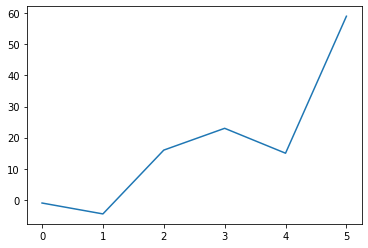

In [67]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23, 15, 59])
plt.show()

Wir sehen einen zusammenhängenden Graphen, obwohl wir nur diskrete Werte für die Ordinate, allgemein auch als Y-Achse bezeichnet, zur Verfügung gestellt hatten. Als Werte für die Abszisse, also die X-Achse, wurden die Indizes genommen.

Indem wir einen Formatstring beim Funktionsaufruf mitübergeben, können wir einen Graphen mit diskreten Werten erzeugen, in unserem Fall mit blauen Vollkreisen. Der Formatstring definiert, wie die diskreten Punkte dazustellen sind:

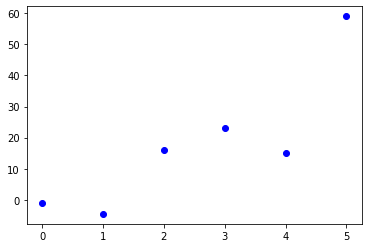

In [68]:
import matplotlib.pyplot as plt
plt.plot([-1, -4.5, 16, 23, 15, 59], "ob")
plt.show()

Die folgenden Zeichen werden in einem Formatstring akzeptiert, um den Linienstil oder die Marker zu steuern:

In [69]:
#Zeichen       Beschreibung
#=============================================
#'-'  (Bindestrich) durchgezogene Linie
#'--'  (zwei Bindestriche) gestrichelte Linie
#'-.' Strichpunkt-Linie
#':' punktierte Linie
#'.' Punkt-Marker
#',' Pixel-Marker
#'o' Kreis-Marker
#'v' Dreiecks-Marker, Spitze nach unten
#'^' Dreiecks-Marker, Spitze nach oben
#'<' Dreiecks-Marker, Spitze nach links
#'>' Dreiecks-Marker, Spitze nach rechs
#'1' tri-runter-Marker
#'2' tri-hoch-Marker
#'3' tri-links Marker
#'4' tri-rechts Marker
#'s' quadratischer Marker
#'p' fünfeckiger Marker
#'*' Stern-Marker
#'h' Sechseck-Marker1
#'H' Sechseck-Marker2
#'+' Plus-Marker
#'x' x-Marker
#'D' rautenförmiger Marker
#'d' dünner rautenförmiger Marker
#'|' Marker in Form einer vertikalen Linie
#'_' Marker in Form einer horizontalen Liniw
#===============================================

Die folgenden Farbabkürzungen sind möglich:

In [70]:
#==================
#Zeichen    Farbe
#==================
#'b' blau
#'g' grün
#'r' rot
#'c' cyan
#'m' magenta
#'y' gelb
#'k' schwarz
#'w' weiß
#==================

Natürlich kann man auch X-Werte an die Plot-Funktion übergeben. Im folgenden Beispiel übergeben wir eine Liste mit den Vielfachen von 3 zwischen 0 und 21 als X-Werte an plot:

[0, 3, 6, 9, 12, 15, 18, 21]


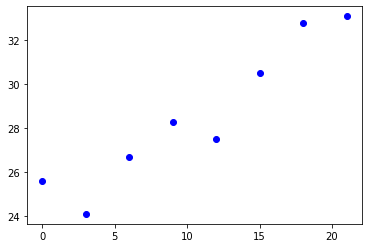

In [71]:
import matplotlib.pyplot as plt
# die X-Werte:
days = list(range(0, 22, 3))
print(days)
# die Y-Werte:
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values,'bo')
plt.show()

#### Achsenbezeichnungen

Wir können das Aussehen unseres Graphen verbessern, indem wir die Achsen mit Bezeichnungen versehen. Dazu benutzen wir die *ylabel-* und *xlabel-*Funktionen von pyplot.

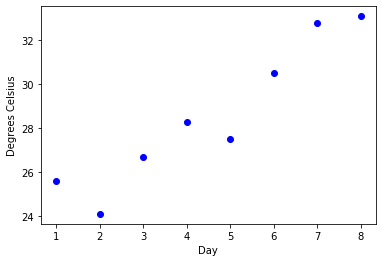

In [72]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values,'bo')
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.show()

Wir können eine beliebige Anzahl von (x, y, fmt)-Gruppen in einer Plot-Funktion spezifizieren. Im folgenden Beispiel benutzen wir zwei verschiedene Listen mit Y-Werten:

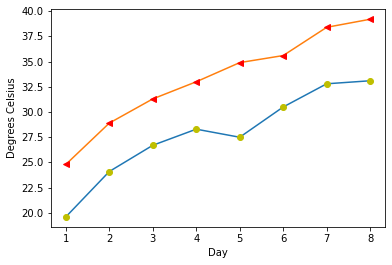

In [73]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min,
         days, celsius_min, "oy",
         days, celsius_max, 
         days, celsius_max, "<r")
plt.show()

#### Abfragen und Ändern des Wertebereichs der Achsen

Mit der Funktion *axis* lässt sich der Wertebereich einer Achse abfragen und ändern. Ruft man *axis* ohne Argumente auf, liefert sie den aktuellen Wertebereich einer Achse zurück:

The current limits for the axes are:
(0.6499999999999999, 8.35, 18.62, 40.18)
We set the axes to the following values:
0 10 14 45


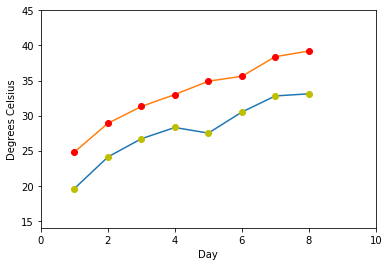

In [74]:
import matplotlib.pyplot as plt
days = list(range(1,9))
celsius_min = [19.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
celsius_max = [24.8, 28.9, 31.3, 33.0, 34.9, 35.6, 38.4, 39.2]
plt.xlabel('Day')
plt.ylabel('Degrees Celsius')
plt.plot(days, celsius_min,
         days, celsius_min, "oy",
         days, celsius_max, 
         days, celsius_max, "or")
print("The current limits for the axes are:")        
print(plt.axis())
print("We set the axes to the following values:")
xmin, xmax, ymin, ymax = 0, 10, 14, 45
print(xmin, xmax, ymin, ymax)
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

#### linspace zur Definition von X-Werten

Im folgenden Beispiel werden wir die NumPy-Funktion *linspace* verwenden. *linspace* wird dazu benutzt, gleichmäßig verteilte Werte innerhalb eines spezifizierten Intervalls zu erzeugen.

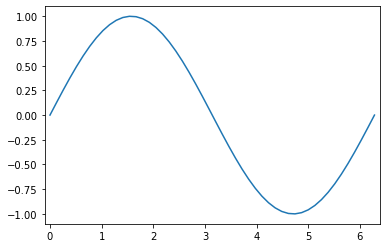

In [75]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F = np.sin(X)
plt.plot(X,F)
startx, endx = -0.1, 2*np.pi + 0.1
starty, endy = -1.1, 1.1
plt.axis([startx, endx, starty, endy])
plt.show()

#### Linienstil ändern

Der Linienstil eines Plots kann durch die Parameter **linestyle** oder ls der plot-Funktion beeinflusst werden. Sie können auf einen der folgenden Werte gesetzt werden:

'-', '--', '-.', ':', 'None', ' ', ''

Wir können mit **linewidth**, wie der Name impliziert, die Linienstärke oder Liniendicke setzen:

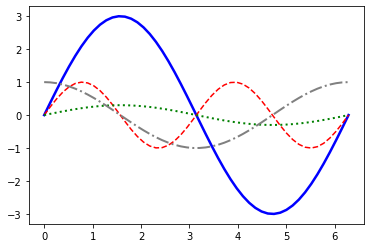

In [76]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
F4 = np.cos(X)
plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, F2, color="red", linewidth=1.5, linestyle="--")
plt.plot(X, F3, color="green", linewidth=2, linestyle=":")
plt.plot(X, F4, color="grey", linewidth=2, linestyle="-.")
plt.show()

#### Flächen einfärben

Mit der pyplot-Funktion *fill_between* ist es möglich, Flächen zwischen Kurven oder Achsen zu schraffieren oder einzufärben. Im folgenden Beispiel füllen wir die Flächen zwischen der X-Achse und dem Graph der Funktion sin(2*X):

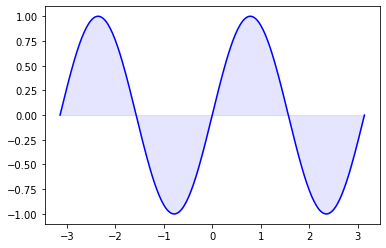

In [77]:
import numpy as np
import matplotlib.pyplot as plt
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)
plt.plot (X, Y, color='blue', alpha=1.00)
plt.fill_between(X, 0, Y, color='blue', alpha=.1)
plt.show()

In [78]:
# Die allgemeine Syntax von fill_between:

# fill_between(x, y1, y2=0, where=None, interpolate=False, **kwargs)

# Die Parameter von fill_between:

# Parameter   Bedeutung
# x           Ein Array mit N Elementen mit X-Werten
# y1          Ein Array mit N Elementen (oder ein Skalar) von Y-Daten
# y2          Ein Array mit N Elementen (oder ein Skalar) von Y-Daten
# where       Wenn auf None gesetzt, wird per Default alles gefüllt. Wenn es nicht auf 
#             None gesetzt wird, so wird ein numpy boolean-Array erwartet mit N Elementen. 
#             Es werden nur dann die Regionen eingefärbt, bei denen where==True ist.
# interpolate Wenn True, so wird zwischen zwei Linien interpoliert, um den genauen Schnittpunkt
#             zu finden. Andernfalls werden die Start- und Endwerte nur als explizite Werte 
#             auf der Region erscheinen.
# kwargs      Schlüsselwort-Argumente, die an PolyCollection übergeben werden.

Im nächsten Beispiel füllen wir die Flächen zwischen den Funktionen F1 und F2:

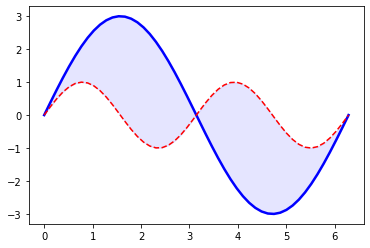

In [79]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True)
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, F2, color="red", linewidth=1.5, linestyle="--")
plt.fill_between(X, F1, F2, color='blue', alpha=.1)
plt.show()

### Histogramme
Ein Histogramm ist eine grafische Repräsentation einer Verteilung von numerischen Daten. Rechtecke mit der gleichen Breite haben Höhen, die den zugehörigen Anzahlen (Frequenzen) entsprechen.

Wenn wir ein Histogramm konstruieren, beginnen wir mit der Verteilung des Bereichs der möglichen x-Werte in gewöhnlich gleich große und benachbarte Klassen bzw. Intervalle, die man in Englisch Bins nennt. Die Daten werden nun entsprechend ihrer Größe in diese Bins verteilt. Für jede Klasse bzw. Intervall werden dann Rechtecke gezeichnet, deren Höhe bzw. Flächeninhalt der relativen oder absoluten Häufigkeit der Klasse entspricht.

Wir schreiben nun ein Python-Programm, indem wir Zufallszahlen erzeugen und aus diesen ein Histogramm erzeugen:

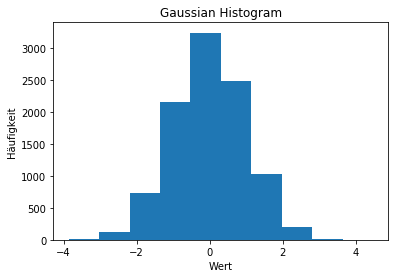

In [80]:
import matplotlib.pyplot as plt
import numpy as np
gaussian_numbers = np.random.normal(size=10000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()

Was bedeuten die Parameter **n, bins, patches:**  
    **n:** Anzahl der Elemente in jedem bin, **bins:** linker Rand jedes bin, **patches:** alle Rechtecke des Histogramms  
        

n=  [9.000e+00 1.230e+02 7.330e+02 2.156e+03 3.247e+03 2.484e+03 1.026e+03
 2.020e+02 1.800e+01 2.000e+00] 10000.0
[-3.8622437  -3.02819233 -2.19414097 -1.36008961 -0.52603824  0.30801312
  1.14206448  1.97611585  2.81016721  3.64421857  4.47826994]
<a list of 10 Patch objects>


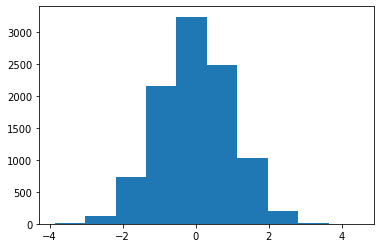

In [81]:
n, bins, patches = plt.hist(gaussian_numbers)
print("n= ",n,sum(n))
print(bins)
print(patches)